In [2]:
#dataframes
import pandas as pd
import h5py
import sys
sys.path.append('../../')
import temporal_functions

#suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.TimeSeries = pd.Series 

#math
import numpy as np
from numpy import (isscalar, r_, log, around, unique, asarray, zeros,
                   arange, sort, amin, amax, atleast_1d, sqrt, array,
                   compress, pi, exp, ravel, count_nonzero, sin, cos,
                   arctan2, hypot)

#plots
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.patches as mpatches
from matplotlib.colors import LogNorm
from figurefirst import FigureLayout,mpl_functions
import figurefirst as fifi


np.set_printoptions(suppress=True)
import fly_plot_lib.plot as fpl
FS=7
colormap = 'bone_r'

In [3]:
## 10 second
folder_path='/home/gadfly/DataAnalysis/data/LagAnalysisPaper/maskedJaleesa/by1000/'
t1=pd.read_hdf(folder_path+'10.20.20_temporal.hdf')
t2=pd.read_hdf(folder_path+'7.7.21_temporal.hdf')
t3=pd.read_hdf(folder_path+'9.26.21_temporal.hdf')
t4=pd.read_hdf(folder_path+'10.29.21_temporal.hdf')
t5=pd.read_hdf(folder_path+'10.30.21_temporal.hdf')
t6=pd.read_hdf(folder_path+'1.8.22_temporal.hdf')
t7=pd.read_hdf(folder_path+'1.11.22_temporal.hdf')
t8=pd.read_hdf(folder_path+'1.15.22_temporal.hdf')
t9=pd.read_hdf(folder_path+'4.30.22_temporal.hdf')
t10=pd.read_hdf(folder_path+'5.1.22_temporal.hdf')
t11=pd.read_hdf(folder_path+'5.2.22_temporal.hdf')
t12=pd.read_hdf(folder_path+'6.1.22_temporal.hdf')
t13=pd.read_hdf(folder_path+'6.3.22_temporal.hdf')
t14=pd.read_hdf(folder_path+'6.7.22_temporal.hdf')
t15=pd.read_hdf(folder_path+'6.8.22_temporal.hdf')
t16=pd.read_hdf(folder_path+'6.22.22_temporal.hdf')

lag_filter=10

t1_1 = pd.read_hdf(folder_path+'hws_temporal.hdf')
t1_1 = t1_1[t1_1['time'] == lag_filter]
t1_1 = t1_1.reset_index(drop=True,inplace=False)

t1_2 = pd.read_hdf(folder_path+'lws_temporal.hdf')
t1_2 = t1_2[t1_2['time'] == lag_filter]
t1_2 = t1_2.reset_index(drop=True,inplace=False)

t2 = t2[t2['time'] == lag_filter]
t2 = t2.reset_index(drop=True,inplace=False)

t1_1['turb_intensity']=t1_1['speed_std']/t1_1['speed_avg']
t1_2['turb_intensity']=t1_2['speed_std']/t1_2['speed_avg']

print('hws',np.mean(t1_1.turb_intensity))
print('lws',np.mean(t1_2.turb_intensity))

alltemp=[t1,t2,t4,t7,t8,t12,t13,t14,t15,t16] ## without urban

# alltemp=[t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16] ## with urban

# Filter each dataframe in the list to include only rows where time == 10
alltemp_new = [df.query('time == 10').copy() for df in alltemp]  # Added .copy() to ensure we're working with a new DataFrame

for df in alltemp_new:
    df.loc[:, 'turb_intensity'] = df['speed_std'] / df['speed_avg']

alltempconcat = pd.concat(alltemp_new)
alltempconcat = alltempconcat.reset_index(drop=True,inplace=False)


hws 0.07033618955608546
lws 0.20070039821842103


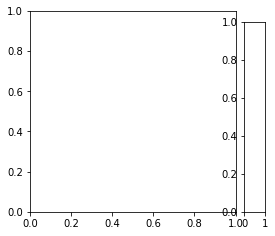

In [46]:
layout = fifi.svg_to_axes.FigureLayout('../../../../Figure/windLagAnalysis.svg',
                                           autogenlayers=True, make_mplfigures=True, hide_layers=[])

In [47]:
ax = layout.axes[('fig1','ax')]

# g = sns.JointGrid(data=alltempconcat, x='speed_avg', y='direction_std', space=0, height=7, ratio=5)

sns.kdeplot(x=alltempconcat.speed_avg, y=alltempconcat.direction_std, cmap='bone_r', 
                    ax=ax, 
                    rasterized=True,
                    cbar=False,
                    norm=LogNorm(),
                    shade=True, 
                    label='All Data')

ax.scatter((t1_1.speed_avg), (t1_1.direction_std), cmap='Blues', s=1, label='HWS',rasterized=True)
ax.scatter((t1_2.speed_avg), (t1_2.direction_std), cmap='Oranges', s=1, label='LWS',rasterized=True)
ax.scatter((t2.speed_avg), (t2.direction_std), cmap='g', s=1, label='Forest',rasterized=True)

ax.set_rasterization_zorder(-20)
ax.grid(False)
ax.set_xlabel('$\mu$(Wind Speed), (m/s)')
ax.set_ylabel('$\sigma$ (Wind Direction), degrees')


mpl_functions.adjust_spines(ax, ['left', 'bottom'],
                            spine_locations={'left': 1, 'bottom': 1}, 
                            smart_bounds=True,   
                            xticks=[0,7],
                            yticks=[0,40,80],
                            linewidth=0.5)



# Custom legend patches
all_patch = mpatches.Patch(color=sns.color_palette("bone_r")[2], label='All Data')
hws_patch = mpatches.Patch(color=sns.color_palette("Blues")[2], label='HWS')
lws_patch = mpatches.Patch(color=sns.color_palette("Oranges")[2], label='LWS')
forest_patch = mpatches.Patch(color=sns.color_palette("Greens")[2], label='Forest')

ax.legend(handles=[all_patch, hws_patch, lws_patch, forest_patch],
          loc='upper left', bbox_to_anchor=(0.5,0.9))

mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../../../Figure/windLagAnalysis.svg')

/home/gadfly/DataAnalysis/pyresearch/lib/python3.8/site-packages/seaborn/distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'rasterized'
  cset = contour_func(


In [48]:
ax = layout.axes[('fig1', 'cbar')]
ytic=[1,10]

fpl.colorbar(ax=ax, colormap='bone_r', orientation='vertical',ticks=ytic)
ax.set_rasterization_zorder(-20)
mpl_functions.adjust_spines(ax, ['left'], 
                                    smart_bounds=True,
                                    spine_locations={'left': 1}, 
                                    yticks=ytic,
                                    tick_length=1.5,
                                    linewidth=0.5)

ax.set_ylabel("Density",rotation=90,labelpad=-20)

ax.set_yticklabels(['2.5%', '100%'])
mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../../../Figure/windLagAnalysis.svg')